In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel(r"C:\Users\Thanmai\Investment Prediction\Reliance.xlsx")
df.head()

,Unnamed: 0,Date,Price,Open,High,Low,Volume,Chg%
0,0,"Mar 17, 2023",2223.10,2242.95,2251.10,2212.95,15.69M,-0.13%
1,1,"Mar 16, 2023",2225.90,2243.00,2254.00,2202.20,8.47M,-0.50%
2,2,"Mar 15, 2023",2237.05,2284.10,2298.30,2227.40,10.03M,-1.71%
3,3,"Mar 14, 2023",2275.95,2280.00,2304.95,2269.05,7.40M,-0.37%
4,4,"Mar 13, 2023",2284.50,2329.00,2344.00,2275.00,5.89M,-1.64%


# Preprocessing Steps

In [3]:
# Dropping "Unnamed: 0	" column
df = df.drop('Unnamed: 0', axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1736 non-null   object 
 1   Price   1736 non-null   float64
 2   Open    1736 non-null   float64
 3   High    1736 non-null   float64
 4   Low     1736 non-null   float64
 5   Volume  1736 non-null   object 
 6   Chg%    1736 non-null   object 
dtypes: float64(4), object(3)
memory usage: 95.1+ KB


### We cam see that the "Date" column is not in Datetime format, "Volume" & "Chg%" columns should be in numerical format (either int or float)

In [5]:
df['Date'] = df['Date'].map(lambda x: str(x).rstrip('E').rstrip('D').rstrip('S'))

In [6]:
#Converting to obj to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df['Date'].dtype

dtype('<M8[ns]')

In [8]:
df

,Date,Price,Open,High,Low,Volume,Chg%
0,2023-03-17,2223.10,2242.95,2251.10,2212.95,15.69M,-0.13%
1,2023-03-16,2225.90,2243.00,2254.00,2202.20,8.47M,-0.50%
2,2023-03-15,2237.05,2284.10,2298.30,2227.40,10.03M,-1.71%
3,2023-03-14,2275.95,2280.00,2304.95,2269.05,7.40M,-0.37%
4,2023-03-13,2284.50,2329.00,2344.00,2275.00,5.89M,-1.64%
...,...,...,...,...,...,...,...
1731,2016-03-22,519.01,513.63,521.18,512.96,7.08M,1.02%
1732,2016-03-21,513.78,509.15,515.86,506.57,5.86M,0.98%
1733,2016-03-18,508.78,504.34,510.24,503.08,6.48M,1.10%
1734,2016-03-17,503.23,508.68,513.58,501.25,7.77M,-0.56%


### In the "Volume" column the values are populating in alphanumeric format, let's change it to numerical format, ie., 15.69M --> 15690000

In [9]:
def convert_to_int(value):
    if value.endswith('M'):
        return int(float(value[:-1]) * 1000000)
    elif value.endswith('K'):
        return int(float(value[:-1]) * 1000)
    else:
        return int(value)


values = df['Volume']
df['Volume'] = df['Volume'].apply(convert_to_int)
print(df['Volume'])

0       15690000
1        8470000
2       10030000
3        7400000
4        5890000
          ...   
1731     7080000
1732     5860000
1733     6480000
1734     7770000
1735     5110000
Name: Volume, Length: 1736, dtype: int64


### In the "Chg%" column the values are populating in percentage format, let's change it to numerical format, ie., -0.13% --> -0.0013

In [10]:
def convert_percentage_to_float(value):
    return float(value.replace('%', ''))/100
        
df['Chg%'] = df['Chg%'].apply(convert_percentage_to_float)
print(df['Chg%'])

0      -0.0013
1      -0.0050
2      -0.0171
3      -0.0037
4      -0.0164
         ...  
1731    0.0102
1732    0.0098
1733    0.0110
1734   -0.0056
1735    0.0012
Name: Chg%, Length: 1736, dtype: float64


In [11]:
df

,Date,Price,Open,High,Low,Volume,Chg%
0,2023-03-17,2223.10,2242.95,2251.10,2212.95,15690000,-0.0013
1,2023-03-16,2225.90,2243.00,2254.00,2202.20,8470000,-0.0050
2,2023-03-15,2237.05,2284.10,2298.30,2227.40,10030000,-0.0171
3,2023-03-14,2275.95,2280.00,2304.95,2269.05,7400000,-0.0037
4,2023-03-13,2284.50,2329.00,2344.00,2275.00,5890000,-0.0164
...,...,...,...,...,...,...,...
1731,2016-03-22,519.01,513.63,521.18,512.96,7080000,0.0102
1732,2016-03-21,513.78,509.15,515.86,506.57,5860000,0.0098
1733,2016-03-18,508.78,504.34,510.24,503.08,6480000,0.0110
1734,2016-03-17,503.23,508.68,513.58,501.25,7770000,-0.0056


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1736 non-null   datetime64[ns]
 1   Price   1736 non-null   float64       
 2   Open    1736 non-null   float64       
 3   High    1736 non-null   float64       
 4   Low     1736 non-null   float64       
 5   Volume  1736 non-null   int64         
 6   Chg%    1736 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 95.1 KB


In [13]:
df.duplicated().sum()

0

In [14]:
# set the 'Date' column as the index
df.set_index('Date', inplace=True)
df.head()

,Price,Open,High,Low,Volume,Chg%
Date,,,,,,
2023-03-17,2223.10,2242.95,2251.10,2212.95,15690000,-0.0013
2023-03-16,2225.90,2243.00,2254.00,2202.20,8470000,-0.0050
2023-03-15,2237.05,2284.10,2298.30,2227.40,10030000,-0.0171
2023-03-14,2275.95,2280.00,2304.95,2269.05,7400000,-0.0037
2023-03-13,2284.50,2329.00,2344.00,2275.00,5890000,-0.0164


### We can see that there are no null values, no duplicates found in the data

In [15]:
df.to_csv('Preprocessed_data.csv')

# Data Analysis

In [16]:
df.describe()

,Price,Open,High,Low,Volume,Chg%
count,1736.000000,1736.000000,1736.000000,1736.000000,1.736000e+03,1736.000000
mean,1493.685933,1494.976336,1511.622051,1477.251774,9.294181e+06,0.001023
std,722.686321,723.548352,731.056203,715.092611,6.978747e+06,0.018396
min,460.630000,459.670000,465.930000,458.480000,7.312100e+05,-0.131500
25%,904.492500,906.297500,914.407500,897.567500,5.240000e+06,-0.008625
50%,1317.460000,1320.060000,1335.810000,1304.240000,7.240000e+06,0.000550
75%,2181.387500,2183.675000,2214.725000,2157.175000,1.067000e+07,0.010500
max,2819.850000,2856.150000,2856.150000,2786.100000,6.585000e+07,0.147200


In [17]:
df.corr()

,Price,Open,High,Low,Volume,Chg%
Price,1.000000,0.999321,0.999747,0.999716,0.014815,-0.003370
Open,0.999321,1.000000,0.999674,0.999672,0.012436,-0.032798
High,0.999747,0.999674,1.000000,0.999599,0.022802,-0.016398
Low,0.999716,0.999672,0.999599,1.000000,0.004951,-0.018142
Volume,0.014815,0.012436,0.022802,0.004951,1.000000,0.151414
Chg%,-0.003370,-0.032798,-0.016398,-0.018142,0.151414,1.000000


<AxesSubplot:>

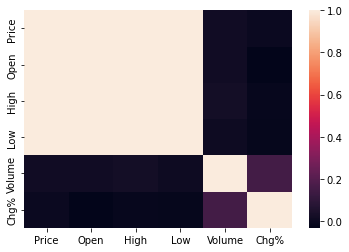

In [18]:
sns.heatmap(df.corr())

### Moving averages: 
A moving average is a popular technical analysis tool used to identify trends and potential reversal points in stock prices. You can calculate a moving average by taking the average of the closing prices over a specified period of time. The moving average can be used to smooth out short-term price fluctuations and identify trends. 

### Volatility analysis: 
Volatility is a measure of how much a stock price fluctuates over time. You can calculate volatility by taking the standard deviation of the daily returns. Higher volatility indicates greater uncertainty and risk, while lower volatility indicates more stability. 

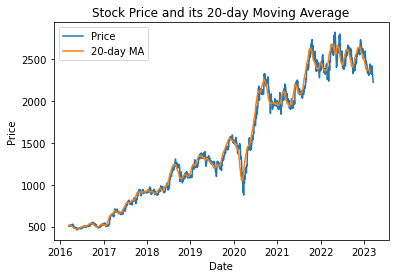

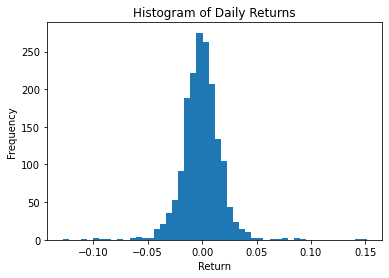

              Price     Open     High      Low    Volume    Chg%    Return  \
Date                                                                         
2023-03-17  2223.10  2242.95  2251.10  2212.95  15690000 -0.0013       NaN   
2023-03-16  2225.90  2243.00  2254.00  2202.20   8470000 -0.0050  0.001260   
2023-03-15  2237.05  2284.10  2298.30  2227.40  10030000 -0.0171  0.005009   
2023-03-14  2275.95  2280.00  2304.95  2269.05   7400000 -0.0037  0.017389   
2023-03-13  2284.50  2329.00  2344.00  2275.00   5890000 -0.0164  0.003757   

            MA20  Cumulative Returns  
Date                                  
2023-03-17   NaN                 NaN  
2023-03-16   NaN            0.001260  
2023-03-15   NaN            0.006275  
2023-03-14   NaN            0.023773  
2023-03-13   NaN            0.027619  


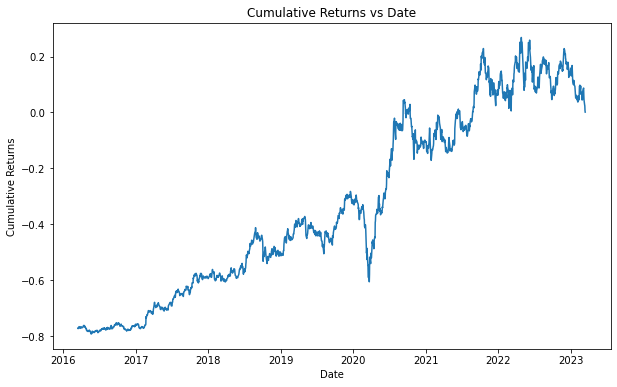

In [20]:
# Calculate daily returns and add a new column to the dataframe
df['Return'] = df['Price'].pct_change()

# Calculate 20-day moving average and add a new column to the dataframe
df['MA20'] = df['Price'].rolling(window=20).mean()

# Plot the stock price and its 20-day moving average
plt.plot(df.index, df['Price'], label='Price')
plt.plot(df.index, df['MA20'], label='20-day MA')
plt.legend()
plt.title('Stock Price and its 20-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


# Plot a histogram of daily returns
plt.hist(df['Return'].dropna(), bins=50)
plt.title('Histogram of Daily Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.show()

# Calculate cumulative returns
df['Cumulative Returns'] = (1 + df['Return']).cumprod() - 1
print(df.head())

# Plot the cumulative returns
plt.figure(figsize=(10,6))
plt.plot(df['Cumulative Returns'])
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns vs Date')
plt.show()

In [21]:
df.head(30)

,Price,Open,High,Low,Volume,Chg%,Return,MA20,Cumulative Returns
Date,,,,,,,,,
2023-03-17,2223.10,2242.95,2251.10,2212.95,15690000,-0.0013,NaN,NaN,NaN
2023-03-16,2225.90,2243.00,2254.00,2202.20,8470000,-0.0050,0.001260,NaN,0.001260
2023-03-15,2237.05,2284.10,2298.30,2227.40,10030000,-0.0171,0.005009,NaN,0.006275
2023-03-14,2275.95,2280.00,2304.95,2269.05,7400000,-0.0037,0.017389,NaN,0.023773
2023-03-13,2284.50,2329.00,2344.00,2275.00,5890000,-0.0164,0.003757,NaN,0.027619
2023-03-10,2322.70,2341.50,2344.00,2315.05,6150000,-0.0155,0.016721,NaN,0.044802
2023-03-09,2359.25,2416.00,2416.90,2355.10,7490000,-0.0240,0.015736,NaN,0.061243
2023-03-08,2417.35,2408.70,2419.00,2385.00,7280000,0.0036,0.024626,NaN,0.087378
2023-03-06,2408.70,2400.00,2424.60,2400.00,4690000,0.0098,-0.003578,NaN,0.083487


### Rolling Window Analysis: 
We can use rolling windows to calculate statistics over a sliding time period. This can be useful for analyzing trends in stock data over time.

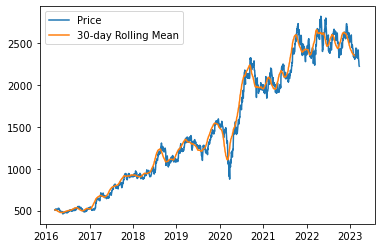

In [23]:
# Compute the rolling mean
rolling_mean = df['Price'].rolling(window=30).mean()

# Plot the rolling mean
plt.plot(df.index, df['Price'], label='Price')
plt.plot(df.index, rolling_mean, label='30-day Rolling Mean')
plt.legend()
plt.show()

### Seasonal Analysis: 
We can use seasonal analysis to determine if there are any recurring patterns in the stock data based on the time of year.

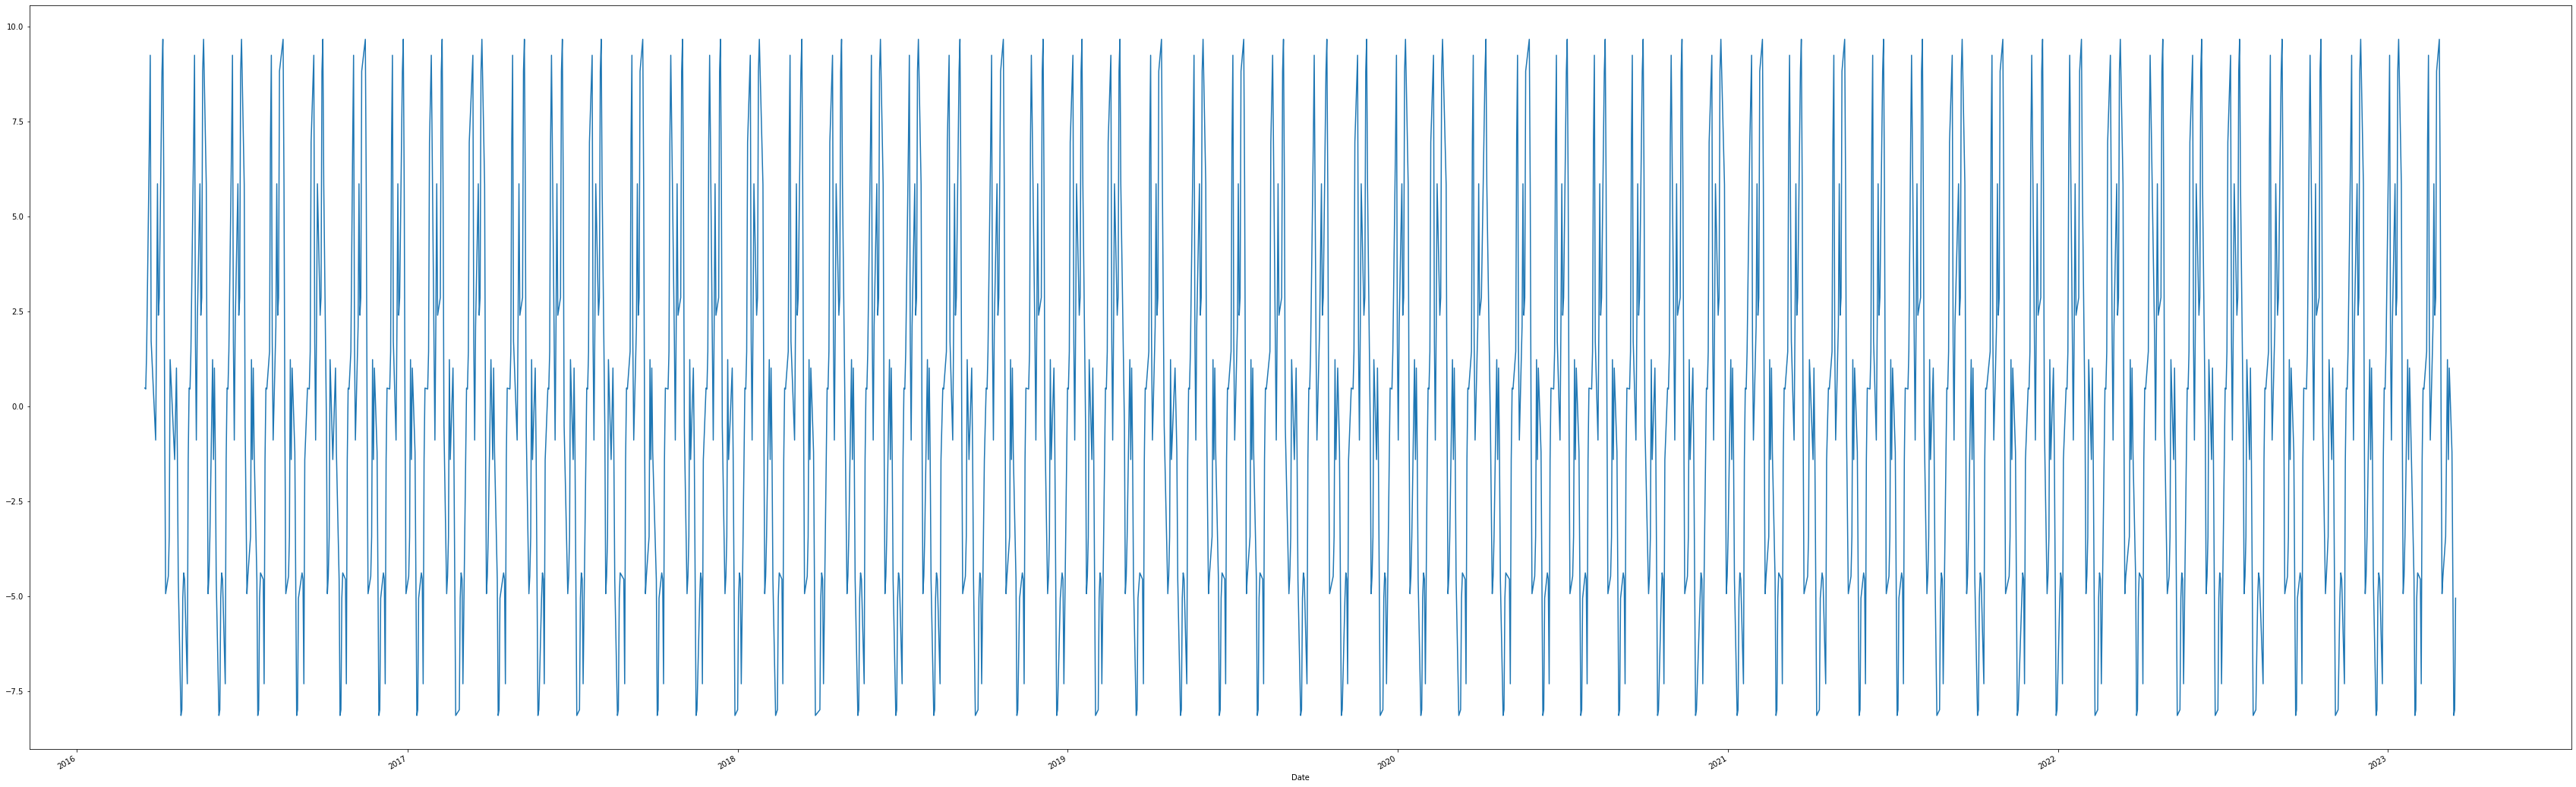

In [35]:
import statsmodels.api as sm

# Decompose the time series into trend, seasonal, and residual components
decomposition = sm.tsa.seasonal_decompose(df['Price'], model='additive', period=30)

# Plot the seasonal component
seasonal = decomposition.seasonal
seasonal.plot(figsize=(60,20))
plt.show()

In [36]:
df

,Price,Open,High,Low,Volume,Chg%,Return,MA20,Cumulative Returns
Date,,,,,,,,,
2023-03-17,2223.10,2242.95,2251.10,2212.95,15690000,-0.0013,NaN,NaN,NaN
2023-03-16,2225.90,2243.00,2254.00,2202.20,8470000,-0.0050,0.001260,NaN,0.001260
2023-03-15,2237.05,2284.10,2298.30,2227.40,10030000,-0.0171,0.005009,NaN,0.006275
2023-03-14,2275.95,2280.00,2304.95,2269.05,7400000,-0.0037,0.017389,NaN,0.023773
2023-03-13,2284.50,2329.00,2344.00,2275.00,5890000,-0.0164,0.003757,NaN,0.027619
...,...,...,...,...,...,...,...,...,...
2016-03-22,519.01,513.63,521.18,512.96,7080000,0.0102,0.018126,514.6865,-0.766538
2016-03-21,513.78,509.15,515.86,506.57,5860000,0.0098,-0.010077,515.1915,-0.768890
2016-03-18,508.78,504.34,510.24,503.08,6480000,0.0110,-0.009732,514.9005,-0.771139


In [ ]:
from pandas_profiling import ProfileReport
#EDA using pandas-profiling
report = ProfileReport(df, explorative=True)
report